## EDA

In [1]:
# Import Libraries
#초기 설정및 시스템 라이브러리
import platform
import warnings

# 데이터 시각화 라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
print(platform.system())
warnings.filterwarnings('ignore')

# 행,열,결과값 생략 없이 보기,세팅
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

# 시각화 OS별 한글폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 폰트 설정
elif platform.system() == 'Mac':
    plt.rcParams['font.family'] = 'AppleGothic'  # Mac 폰트 설정
    
print("="*60)
print("라이브러리 로드 완료!")
print("한글 폰트 설정 완료!")
print("="*60)

Windows
라이브러리 로드 완료!
한글 폰트 설정 완료!


### 성장률

In [ ]:
df_ipo_industry    = pd.read_csv("./data/join/ipo_industry_final.csv")       # IPO(산업)
df_ipo_size        = pd.read_csv("./data/join/ipo_size_final.csv")           # IPO(규모)
df_ipo_addr        = pd.read_csv("./data/join/ipo_addr_final.csv")           # IPO(위치)
df_ipo_issues      = pd.read_csv("./data/join/ipo_issues_final.csv")         # IPO(이슈/마일스톤)

#### 성장률(산업)
(obj, acq)
어떤 산업군에 속한 스타트업의 M&A 성공률이 높을까

In [3]:
df_ipo_industry.columns

Index(['objects_cfpr_id', 'entity_type', 'parent_c_id', 'normalized_name',
       'category_code', 'status', 'founded_at', 'closed_at', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships',
       'is_obj_parent_id_missing', 'is_obj_category_missing',
       'is_obj_founded_missing', 'is_obj_closed_missing',
       'is_obj_overview_missing', 'is_obj_state_missing',
       'is_obj_inv_rounds_missing', 'is_obj_inv_comp_missing',
       'cat_obj_status', 'obj_overview_fixed', 'cat_obj_overview',
       'obj_region_fixed', 'cat_obj_region', 'obj_state_filled',
       'obj_city_fixed', 'obj_category_filled',
       'is_obj_funding_total_usd_private', 'is_obj_funding_rounds_private',
     

In [4]:
# 분석 단위 (회사당 여러 라운드)
# df_ipo_industry
print(df_ipo_industry.shape) # (462621, 62)
print(df_ipo_industry[["objects_cfpr_id"]].nunique()) # ignore NaN values 462620
print(round((df_ipo_industry["ipos_c_id"].notna().mean()) * 100, 2)) # 0.27%

(462621, 62)
objects_cfpr_id    462620
dtype: int64
0.27


In [5]:
# 스타트업 관점이므로 object_cfpr_id를 'c'로 제한
print(df_ipo_industry.shape[0]) # 조건 부여 전 462621행
cond1 = (df_ipo_industry['objects_cfpr_id'].str[0] == "c")
ipo_industry = df_ipo_industry.loc[cond1]
print(ipo_industry.shape[0]) # 조건 부여 후 196550행

462621
196550


IPO 못한 회사가 얼마나 될까?

In [6]:
# IPO 못한 회사 → 195311건
cond1 = (ipo_industry["ipos_c_id"].isna())
num_no_ipo = ipo_industry.loc[cond1, "objects_cfpr_id"].nunique()

# 전체에서 비율 → 99.37 %
ipo_total_company = ipo_industry["objects_cfpr_id"].nunique()
no_ipo_ratio = round(num_no_ipo/ipo_total_company * 100, 2)

print("전체 회사 수:", ipo_total_company)   # 196549
print("IPO 못한 회사 수:", num_no_ipo)      # 195311
print("비율:", no_ipo_ratio,"%")           # 99.37 %

전체 회사 수: 196549
IPO 못한 회사 수: 195311
비율: 99.37 %


TOP5 산업군은 무엇일까?

In [7]:
# 산업군 분포확인
display(ipo_industry["category_code"].describe())
display(ipo_industry["category_code"].value_counts(dropna=False).head(20))

count       123187
unique          42
top       software
freq         17922
Name: category_code, dtype: object

category_code
NaN                 73363
software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7521
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
Name: count, dtype: int64

In [8]:
ipo_industry.columns

Index(['objects_cfpr_id', 'entity_type', 'parent_c_id', 'normalized_name',
       'category_code', 'status', 'founded_at', 'closed_at', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships',
       'is_obj_parent_id_missing', 'is_obj_category_missing',
       'is_obj_founded_missing', 'is_obj_closed_missing',
       'is_obj_overview_missing', 'is_obj_state_missing',
       'is_obj_inv_rounds_missing', 'is_obj_inv_comp_missing',
       'cat_obj_status', 'obj_overview_fixed', 'cat_obj_overview',
       'obj_region_fixed', 'cat_obj_region', 'obj_state_filled',
       'obj_city_fixed', 'obj_category_filled',
       'is_obj_funding_total_usd_private', 'is_obj_funding_rounds_private',
     

In [9]:
ipo_industry["is_ipo"].value_counts(dropna=False)

is_ipo
0    195311
1      1239
Name: count, dtype: int64

In [10]:
# 산업군 분포확인
cond1 = (ipo_industry["is_ipo"] == 1)
ipo_industry.loc[cond1, "category_code"].value_counts()

category_code
biotech             262
software            134
hardware             96
other                79
enterprise           61
semiconductor        60
cleantech            58
web                  55
mobile               54
public_relations     35
network_hosting      33
games_video          32
ecommerce            27
advertising          26
finance              24
consulting           22
security             22
manufacturing        14
medical              13
health               11
hospitality          10
news                  7
search                7
real_estate           5
messaging             5
social                5
automotive            4
education             3
analytics             3
transportation        3
fashion               3
photo_video           1
legal                 1
nanotech              1
music                 1
travel                1
local                 1
Name: count, dtype: int64

산업군의 이상치는?

In [11]:
# category_code 이상치 분석
# 1) category_code가 없는 건 일단 제외 & 인수된 건만
cond1 = ipo_industry["category_code"].notna()
cond2 = ipo_industry["is_ipo"] == 1
ipo_industry_offered = ipo_industry[cond1 & cond2].copy()

# 2) (category_code, 회사) 쌍 기준으로 중복 제거 한 회사가 같은 category_code로 여러 행 있어도 1번만 카운트
ipo_industry_offered_unique = ipo_industry_offered.drop_duplicates(subset=["category_code", "ipos_c_id"])

# 3) category_code별 회사 수 (고유 회사 기준)
ipo_cat_company_counts = (
    ipo_industry_offered_unique
    .groupby("category_code")["ipos_c_id"]
    .nunique()
    .sort_values(ascending=False)
)

print("category_code별 회사 수(전체):", ipo_cat_company_counts.sum())
display(ipo_cat_company_counts)


category_code별 회사 수(전체): 1178


category_code
biotech             262
software            134
hardware             96
other                79
enterprise           61
semiconductor        60
cleantech            58
web                  55
mobile               54
public_relations     35
network_hosting      33
games_video          31
ecommerce            27
advertising          26
finance              24
consulting           22
security             22
manufacturing        14
medical              13
health               11
hospitality          10
search                7
news                  7
messaging             5
social                5
real_estate           5
automotive            4
analytics             3
fashion               3
education             3
transportation        3
legal                 1
local                 1
photo_video           1
music                 1
nanotech              1
travel                1
Name: ipos_c_id, dtype: int64

In [12]:
# IQR로 이상치 파악
Q1 = ipo_cat_company_counts.quantile(0.25)  # 1사분위수
Q3 = ipo_cat_company_counts.quantile(0.75)  # 3사분위수
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

Q1: 3.0
Q3: 35.0
IQR: 32.0
lower_bound: -45.0
upper_bound: 83.0


In [13]:
# 1) 상한 초과 → 회사 수가 유난히 많은 카테고리
high_outliers = ipo_cat_company_counts[ipo_cat_company_counts > upper_bound]

# 2) 하한 미만 → 회사 수가 유난히 적은 카테고리
low_outliers = ipo_cat_company_counts[ipo_cat_company_counts < lower_bound]

print("❓ 회사 수가 많은 이상치 카테고리")
print(high_outliers)

print("\n❓ 회사 수가 적은 이상치 카테고리")
print(low_outliers)

❓ 회사 수가 많은 이상치 카테고리
category_code
biotech     262
software    134
hardware     96
Name: ipos_c_id, dtype: int64

❓ 회사 수가 적은 이상치 카테고리
Series([], Name: ipos_c_id, dtype: int64)


산업군별 IPO 성공률은?

In [14]:
# 산업군별 IPO 성공률
ipo_industry_success = (
    ipo_industry
    .groupby("category_code")
    .agg(
        ipo_rate=("is_ipo", "mean"),            # IPO 성공률
        n_companies=("objects_cfpr_id", "nunique"),  # 산업군 내 회사 수
        n_ipo=("is_ipo", "sum")          # 인수된 회사 수
    )
    .assign(ipo_rate=lambda x: round(x["ipo_rate"] * 100, 2))  # %
    .sort_values("ipo_rate", ascending=False)
)

display(ipo_industry_success)

,ipo_rate,n_companies,n_ipo
category_code,,,
semiconductor,8.62,696,60
biotech,5.91,4430,262
hardware,3.25,2951,96
cleantech,2.99,1940,58
manufacturing,2.06,680,14
security,1.88,1171,22
finance,1.73,1386,24
messaging,1.69,296,5
nanotech,1.43,70,1


카테고리 코드에 필터를 적용해야하지 않을까?

In [15]:
# category_code별 건수 집계
ipo_cat_counts = ipo_industry["category_code"].value_counts()

# IQR 계산
Q1 = ipo_cat_counts.quantile(0.25)
Q3 = ipo_cat_counts.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("하한(lower_bound):", lower_bound)

# Q1 이상 범위의 category_code만 선택
ipo_valid_categories = ipo_cat_counts[
    (ipo_cat_counts >= Q1)
].index

# 데이터프레임에 정상 category_code만 남기기
ipo_cat_filtered = ipo_industry[ipo_industry["category_code"].isin(ipo_valid_categories)].copy()

print("전체 category_code 수:", ipo_industry["category_code"].nunique())
print("필터 후 category_code 수:", ipo_cat_filtered["category_code"].nunique())

Q1: 567.5
Q3: 2938.5
IQR: 2371.0
하한(lower_bound): -2989.0
전체 category_code 수: 42
필터 후 category_code 수: 31


In [16]:
# 산업군별 IPO 성공률 (필터적용 후)
ipo_industry_success_filtered = (
    ipo_cat_filtered
    .groupby("category_code")
    .agg(
        ipo_rate=("is_ipo", "mean"),            # IPO 성공률
        n_companies=("objects_cfpr_id", "nunique"),  # 산업군 내 회사 수
        n_ipo=("is_ipo", "sum")            # 인수된 회사 수
        
    )
    .assign(ipo_rate=lambda x: round(x["ipo_rate"] * 100, 2)) 
    .sort_values("ipo_rate", ascending=False)
)

display(ipo_industry_success_filtered)

,ipo_rate,n_companies,n_ipo
category_code,,,
semiconductor,8.62,696,60
biotech,5.91,4430,262
hardware,3.25,2951,96
cleantech,2.99,1940,58
manufacturing,2.06,680,14
security,1.88,1171,22
finance,1.73,1386,24
network_hosting,1.40,2350,33
enterprise,1.37,4441,61


#### 성장률(규모)
(obj, rel, ipo)
어떤 규모의 스타트업 IPO 성공률이 높을까

In [17]:
# 분석 단위 (회사당 여러 라운드)
# df_ipo_size
print(df_ipo_size.shape) # (726737, 72)
print(df_ipo_size[["objects_cfpr_id"]].nunique()) # ignore NaN values 462620
print(round((df_ipo_size["rel_cf_id"].notna().mean())*100, 2)) # 55.08% notna
print(round((df_ipo_size["ipos_c_id"].notna().mean())*100, 2))  # 3.86% notna

(726737, 72)
objects_cfpr_id    462620
dtype: int64
55.08
3.86


In [18]:
# 스타트업 관점이므로 object_cfpr_id를 'c'로 제한
print(df_ipo_size.shape[0]) # 조건 부여 전 728207행
cond1 = (df_ipo_size['objects_cfpr_id'].str[0] == "c")
ipo_size = df_ipo_size.loc[cond1]
print(ipo_size.shape[0]) # 조건 부여 후 433660행

726737
432190


스타트업(obj)이 관계(rel)에 의해 얼마나 증가할까?(행증가)

In [19]:
print(ipo_size[["objects_cfpr_id"]].nunique()) # 196549
print(ipo_size[["relationship_id"]].nunique()) # 364820
print(ipo_size[["ipos_c_id"]].nunique()) # 1238

objects_cfpr_id    196549
dtype: int64
relationship_id    364820
dtype: int64
ipos_c_id    1238
dtype: int64


In [20]:
ipo_obj_n = ipo_size["objects_cfpr_id"].nunique()
ipo_rel_n = ipo_size["relationship_id"].nunique()

ipo_obj_rel_ratio = round((ipo_obj_n / ipo_rel_n) * 100, 2)

print(ipo_obj_rel_ratio) # 53.88% 증가!

53.88


In [21]:
# 맺어진 관계가 없는 회사
print(ipo_size[["relationship_id"]].isna().sum()) # 67208

cond1 = (ipo_size["relationship_id"].isna())
print(ipo_size.loc[cond1, "ipos_c_id"].value_counts().sum()) #111

relationship_id    67208
dtype: int64
111


IPO 성공한 스타트업은 평균 몇 개의 관계가 있을까?

In [22]:
# 인수 성공한 스타트업으로 데이터 제한
ipo_size_offered = ipo_size[ipo_size["is_ipo"] == 1].copy()

# 회사-사람 관계만으로 규모 요약
rel_per_company = (
    ipo_size_offered.dropna(subset=["rel_p_id"])  # 사람 관계 있는 행만
      .groupby("objects_cfpr_id")["rel_p_id"]
      .nunique()
      .rename("total_rel_count")
)

# 현재 관계만
current_rel_per_company = (
    ipo_size_offered[ipo_size_offered["is_past"] == 0]
      .groupby("objects_cfpr_id")["rel_p_id"]
      .nunique()
      .rename("current_rel_count")
)


# 회사별 대표 category
company_category = (
    ipo_size_offered
    .dropna(subset=["category_code"])
    .groupby("objects_cfpr_id")["category_code"]
    .first()
    .rename("category_code")
)

# 최종 테이블
ipo_size_rel = (
    pd.concat([rel_per_company, current_rel_per_company], axis=1)
      .fillna(0)
      .merge(company_category, left_index=True, right_index=True, how="left")
)

In [23]:
display(ipo_size_rel.describe())

,total_rel_count,current_rel_count
count,1127.000000,1127.000000
mean,23.304348,7.997338
std,73.092879,16.003912
min,1.000000,0.000000
25%,3.000000,2.000000
50%,7.000000,3.000000
75%,19.000000,9.000000
max,1091.000000,314.000000


current_rel_count와 total_rel_count간 차이가 큰 회사?

In [24]:
# 전체에서 현재 관계 수가 얼마나 바뀌었나
ipo_size_rel["diff_tot_cur_rel"] = (
    ipo_size_rel["total_rel_count"] - ipo_size_rel["current_rel_count"]
)

ipo_size_rel_sorted = ipo_size_rel.sort_values(
    by="diff_tot_cur_rel",
    ascending=False
)

display(ipo_size_rel_sorted.sort_values(by="diff_tot_cur_rel", ascending=False))

,total_rel_count,current_rel_count,category_code,diff_tot_cur_rel
objects_cfpr_id,,,,
c:1242,1091,178.0,software,913.0
c:29,872,101.0,web,771.0
c:3246,818,87.0,software,731.0
c:59,987,314.0,search,673.0
c:2680,611,75.0,enterprise,536.0
...,...,...,...,...
c:38752,17,17.0,biotech,0.0
c:221060,7,7.0,biotech,0.0
c:37269,2,2.0,network_hosting,0.0


스타트업의 규모 분포

In [25]:
# current_rel_count 규모 구간 만들기 : quantile 기반
q = ipo_size_rel["current_rel_count"].quantile([0.25, 0.5, 0.75])

bins = [-1, q[0.25], q[0.5], q[0.75], ipo_size_rel["current_rel_count"].max()]
labels = ["초소형팀", "소형팀", "중형팀", "대형팀"] 
# 초소형 1705 | 소형 1233 | 중형 1434 | 대형 1116

# 전체&현재 관계 
ipo_size_rel["size_bin"] = pd.cut(ipo_size_rel["current_rel_count"], bins=bins, labels=labels)

print("구간:", bins)
display(ipo_size_rel["size_bin"].value_counts())

구간: [-1, np.float64(2.0), np.float64(3.0), np.float64(9.0), np.float64(314.0)]


size_bin
초소형팀    400
중형팀     279
대형팀     268
소형팀     180
Name: count, dtype: int64

In [26]:
ipo_size.columns

Index(['objects_cfpr_id', 'entity_type', 'parent_c_id', 'normalized_name',
       'category_code', 'status', 'founded_at', 'closed_at', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships',
       'is_obj_parent_id_missing', 'is_obj_category_missing',
       'is_obj_founded_missing', 'is_obj_closed_missing',
       'is_obj_overview_missing', 'is_obj_state_missing',
       'is_obj_inv_rounds_missing', 'is_obj_inv_comp_missing',
       'cat_obj_status', 'obj_overview_fixed', 'cat_obj_overview',
       'obj_region_fixed', 'cat_obj_region', 'obj_state_filled',
       'obj_city_fixed', 'obj_category_filled',
       'is_obj_funding_total_usd_private', 'is_obj_funding_rounds_private',
     

 회사 규모별 IPO 성공률은 어떻게 될까?

In [27]:
ipo_size["public_at"] = pd.to_datetime(ipo_size["public_at"], errors="coerce")

# 회사별 IPO
ipo_public_per_company = (
    ipo_size.dropna(subset=["ipos_c_id", "ipo_raised_amount_usd"])
      .sort_values(["objects_cfpr_id", "public_at"])
      .groupby("objects_cfpr_id")
      .agg(
          last_round_amt=("funding_total_usd", "max"),  # 투자 라운드 마지막 금액
          last_raised_amt=("ipo_raised_amount_usd", "last"),     # 상장 금액
          first_public_year=("public_at", lambda x: x.min().year if x.notna().any() else np.nan),
          last_public_year=("public_at", lambda x: x.max().year if x.notna().any() else np.nan)
      )
)

# 계산 다시 !
# 성장률 계산 = 투자 라운드 마지막 금액 / 인수 금액 (마지막 투자라운드 금액과 인수금액이 0이상인 데이터만)
cond1 =  ipo_public_per_company["last_round_amt"] > 0 
cond2 =  ipo_public_per_company["last_raised_amt"] > 0 
ipo_public_per_company = ipo_public_per_company[cond1 & cond2]
ipo_public_per_company["ipo_ratio"] = (
    ipo_public_per_company["last_raised_amt"] / ipo_public_per_company["last_round_amt"]
)

display(ipo_public_per_company.sort_values(by="ipo_ratio", ascending=False))

,last_round_amt,last_raised_amt,first_public_year,last_public_year,ipo_ratio
objects_cfpr_id,,,,,
c:24930,1.000000e+06,9.470000e+08,2013.0,2013.0,947.000000
c:23311,4.000000e+06,2.600000e+08,2013.0,2013.0,65.000000
c:229328,3.131088e+07,9.660000e+08,2013.0,2013.0,30.851896
c:14839,1.500000e+07,2.540000e+08,2013.0,2013.0,16.933333
c:70725,9.300000e+06,1.090000e+08,2010.0,2010.0,11.720430
c:26025,2.000000e+07,2.233000e+08,2010.0,2010.0,11.165000
c:223425,7.000000e+06,6.900000e+07,2004.0,2004.0,9.857143
c:213595,7.597653e+06,7.000000e+07,2013.0,2013.0,9.213372
c:235945,6.309755e+06,5.300000e+07,NaN,NaN,8.399692


In [28]:
# 회사별 규모 + 회사정보
ipo_size_company = (
    ipo_size_rel
    .join(ipo_public_per_company, how="inner")
    .join(
        ipo_size.groupby("objects_cfpr_id")[["entity_type"]].first(),
        how="left"
    )
)

print(ipo_size_company.columns)
# 보기 쉽게 인덱스 변경
front_cols = ["category_code", "size_bin",  "ipo_ratio", "current_rel_count", "total_rel_count"]
other_cols = [c for c in ipo_size_company.columns if c not in front_cols]

ipo_size_company = ipo_size_company[front_cols + other_cols]
display(ipo_size_company.columns)

Index(['total_rel_count', 'current_rel_count', 'category_code',
       'diff_tot_cur_rel', 'size_bin', 'last_round_amt', 'last_raised_amt',
       'first_public_year', 'last_public_year', 'ipo_ratio', 'entity_type'],
      dtype='object')


Index(['category_code', 'size_bin', 'ipo_ratio', 'current_rel_count',
       'total_rel_count', 'diff_tot_cur_rel', 'last_round_amt',
       'last_raised_amt', 'first_public_year', 'last_public_year',
       'entity_type'],
      dtype='object')

In [29]:
ipo_size_company.sort_values(by="ipo_ratio", ascending=False)

,category_code,size_bin,ipo_ratio,current_rel_count,total_rel_count,diff_tot_cur_rel,last_round_amt,last_raised_amt,first_public_year,last_public_year,entity_type
objects_cfpr_id,,,,,,,,,,,
c:24930,biotech,초소형팀,947.000000,1.0,12,11.0,1.000000e+06,9.470000e+08,2013.0,2013.0,Company
c:23311,software,대형팀,65.000000,21.0,21,0.0,4.000000e+06,2.600000e+08,2013.0,2013.0,Company
c:229328,biotech,소형팀,30.851896,3.0,3,0.0,3.131088e+07,9.660000e+08,2013.0,2013.0,Company
c:14839,software,대형팀,16.933333,12.0,14,2.0,1.500000e+07,2.540000e+08,2013.0,2013.0,Company
c:70725,hardware,초소형팀,11.720430,2.0,2,0.0,9.300000e+06,1.090000e+08,2010.0,2010.0,Company
c:223425,NaN,초소형팀,9.857143,1.0,1,0.0,7.000000e+06,6.900000e+07,2004.0,2004.0,Company
c:213595,biotech,중형팀,9.213372,4.0,7,3.0,7.597653e+06,7.000000e+07,2013.0,2013.0,Company
c:235945,biotech,소형팀,8.399692,3.0,3,0.0,6.309755e+06,5.300000e+07,NaN,NaN,Company
c:227029,health,중형팀,7.713775,4.0,4,0.0,9.722866e+06,7.500000e+07,2013.0,2013.0,Company


In [30]:
# 구성 (현재&과거 인원 비) → 높은값= 자주 떠나는, 낮은값=오래남는
ipo_size_company["rel_mem_ratio"] = (
    (ipo_size_company["total_rel_count"] - ipo_size_company["current_rel_count"]) 
    / ipo_size_company["total_rel_count"].replace(0, np.nan)
)
display(ipo_size_company.sort_values(by="rel_mem_ratio", ascending=False))

,category_code,size_bin,ipo_ratio,current_rel_count,total_rel_count,diff_tot_cur_rel,last_round_amt,last_raised_amt,first_public_year,last_public_year,entity_type,rel_mem_ratio
objects_cfpr_id,,,,,,,,,,,,
c:4999,enterprise,초소형팀,0.806452,0.0,18,18.0,1.860000e+08,1.500000e+08,2001.0,2001.0,Company,1.000000
c:24930,biotech,초소형팀,947.000000,1.0,12,11.0,1.000000e+06,9.470000e+08,2013.0,2013.0,Company,0.916667
c:13219,mobile,소형팀,0.105263,3.0,17,14.0,5.700000e+09,6.000000e+08,2007.0,2007.0,Company,0.823529
c:1863,network_hosting,중형팀,7.009020,6.0,27,21.0,6.844560e+06,4.797366e+07,NaN,NaN,Company,0.777778
c:5990,software,대형팀,2.597015,37.0,122,85.0,3.685000e+08,9.570000e+08,2007.0,2007.0,Company,0.696721
c:225182,biotech,중형팀,6.259259,4.0,11,7.0,1.350000e+07,8.450000e+07,2009.0,2009.0,Company,0.636364
c:104377,advertising,대형팀,0.644330,10.0,24,14.0,1.164000e+08,7.500000e+07,2013.0,2013.0,Company,0.583333
c:3626,public_relations,중형팀,4.000000,7.0,15,8.0,3.000000e+07,1.200000e+08,2012.0,2012.0,Company,0.533333
c:5,social,대형팀,7.585439,125.0,259,134.0,2.425700e+09,1.840000e+10,2012.0,2012.0,Company,0.517375


#### 성장률(위치)
(off, obj, ipo)

In [31]:
print(df_ipo_addr.shape)     # (112870, 62)

print(df_ipo_addr[["office_id"]].nunique())          # 112718
print(df_ipo_addr[["objects_cfpr_id"]].nunique())    # 95043
print(df_ipo_addr[["ipos_c_id"]].nunique())      # 1193

(112719, 73)
office_id    112718
dtype: int64
objects_cfpr_id    95043
dtype: int64
ipos_c_id    1193
dtype: int64


In [32]:
# 오피스 수 대비 회사 수
# 혹시 모를 중복 제거: 회사–오피스 쌍 기준으로 한 번만 남기기
ipo_addr = df_ipo_addr.drop_duplicates(
    subset=["objects_cfpr_id", "office_id"]
)

# 1) 오피스 정보가 있는 회사 수
n_comp_with_office = ipo_addr["objects_cfpr_id"].nunique()

# 2) 전체 오피스 수
n_offices = ipo_addr["office_id"].nunique()

# 3) 회사당 평균 오피스 수
avg_office_per_company = n_offices / n_comp_with_office

# 4) 상장 이력이 있는 오피스 수 
n_ipo_off = ipo_addr.loc[ipo_addr["is_ipo"]==1, "office_id"].nunique()


print("오피스가 있는 회사 수:", n_comp_with_office)
print("오피스 수:", n_offices)
print("회사당 평균 오피스 수:", avg_office_per_company)
print("상장 이력이 있는 오피스 수:", n_ipo_off)

print("="*60)
ipo_total_companies = ipo_addr.shape[0]

print("전체 회사 수:", ipo_total_companies)
print("오피스 정보가 있는 회사 비율:", round((n_comp_with_office / ipo_total_companies) * 100, 2), "%")


오피스가 있는 회사 수: 95043
오피스 수: 112718
회사당 평균 오피스 수: 1.1859684563829003
상장 이력이 있는 오피스 수: 1553
전체 회사 수: 112718
오피스 정보가 있는 회사 비율: 84.32 %


IPO 성공한 스타트업이 많은 국가 TOP5

,country_code_x,n_ipo
172,USA,1028
31,CAN,48
60,GBR,48
34,CHN,42
82,ISR,23
86,JPN,19
11,AUS,16
46,DEU,16
76,IND,13
58,FRA,12


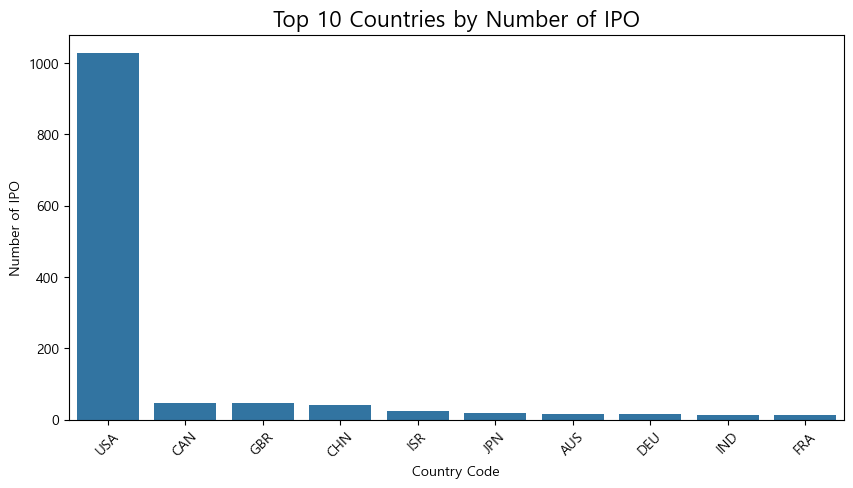

In [33]:
# 나라별 IPO 수
ipo_by_country = (
    ipo_addr
    .groupby("country_code_x")["ipos_c_id"]
    .nunique()
    .reset_index(name="n_ipo")
)

display(ipo_by_country.sort_values(by="n_ipo", ascending=False))

# 상위 10개 국가 - bar
top10 = ipo_by_country.nlargest(10, "n_ipo")

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top10,
    x="country_code_x",
    y="n_ipo"
)

plt.title("Top 10 Countries by Number of IPO", fontsize=16)
plt.xlabel("Country Code")
plt.ylabel("Number of IPO")
plt.xticks(rotation=45)
plt.show()

,region,n_ipo
4419,SF Bay,186
588,Boston,109
3572,New York,65
2943,Los Angeles,64
4557,San Diego,46
...,...,...
5972,wilkes barre,0
5973,xiamen,0
5974,yahud,0
5975,yaounde,0


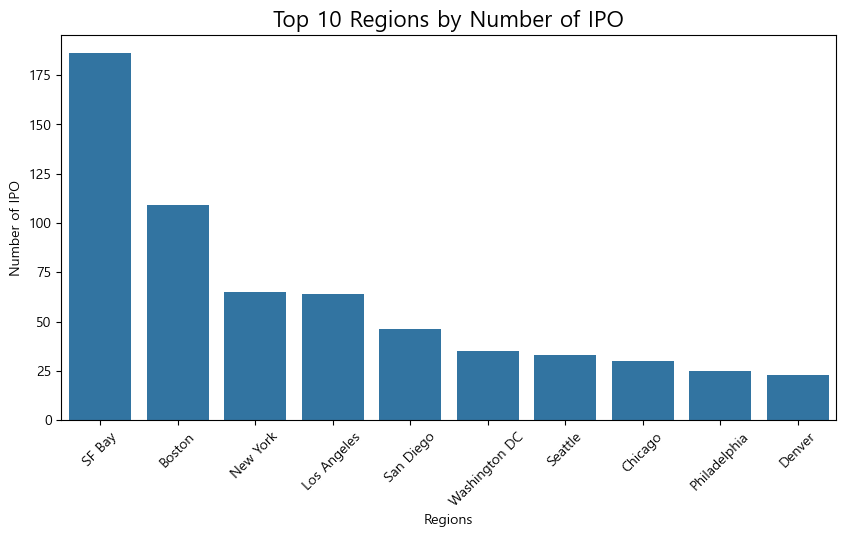

In [34]:
# 지역별 IPO 수
ipo_by_region = (
    ipo_addr
    .groupby("region")["ipos_c_id"]
    .nunique()
    .reset_index(name="n_ipo")
)

display(ipo_by_region.sort_values(by="n_ipo", ascending=False))

# 상위 10개 지역 - bar
top10 = ipo_by_region.nlargest(10, "n_ipo")

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top10,
    x="region",
    y="n_ipo"
)

plt.title("Top 10 Regions by Number of IPO", fontsize=16)
plt.xlabel("Regions")
plt.ylabel("Number of IPO")
plt.xticks(rotation=45)
plt.show()

#### 성장률(이슈/마일스톤)
(mile, obj, ipo)

In [35]:
print(df_ipo_issues.shape)     # (39459, 67)

print(df_ipo_issues[["mile_cfpr_id"]].nunique())          # 17159
print(df_ipo_issues[["objects_cfpr_id"]].nunique())    # 17009
print(df_ipo_issues[["ipos_c_id"]].nunique())      # 600

(39459, 67)
mile_cfpr_id    17159
dtype: int64
objects_cfpr_id    17009
dtype: int64
ipos_c_id    600
dtype: int64


In [36]:
# 기본구조 확인
print(df_ipo_issues.shape) # (39575, 57)
print(df_ipo_issues.columns.tolist())

display(df_ipo_issues.head())

(39459, 67)
['Unnamed: 0', 'mile_cfpr_id', 'milestone_at', 'description_x', 'cat_mile_description', 'objects_cfpr_id', 'entity_type', 'parent_c_id', 'normalized_name', 'category_code', 'status', 'founded_at', 'closed_at', 'description_y', 'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region', 'first_investment_at', 'last_investment_at', 'investment_rounds', 'invested_companies', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'is_obj_parent_id_missing', 'is_obj_category_missing', 'is_obj_founded_missing', 'is_obj_closed_missing', 'is_obj_overview_missing', 'is_obj_state_missing', 'is_obj_inv_rounds_missing', 'is_obj_inv_comp_missing', 'cat_obj_status', 'obj_overview_fixed', 'cat_obj_overview', 'obj_region_fixed', 'cat_obj_region', 'obj_state_filled', 'obj_city_fixed', 'obj_category_filled', 'is_obj_funding_total_usd_private', 'is_obj_funding_rounds_private', 'ipo_id'

,Unnamed: 0,mile_cfpr_id,milestone_at,description_x,cat_mile_description,objects_cfpr_id,entity_type,parent_c_id,normalized_name,category_code,status,founded_at,closed_at,description_y,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,...,cat_obj_overview,obj_region_fixed,cat_obj_region,obj_state_filled,obj_city_fixed,obj_category_filled,is_obj_funding_total_usd_private,is_obj_funding_rounds_private,ipo_id,ipos_c_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,is_ipos_public_at_missing,stock_normalized,is_ipos_valuation_private,valuation_amount_usd,valuation_currency_rate,is_ipos_raised_private,ipo_raised_amount_usd,ipo_raised_currency_rate,is_ipo
0,0,c:12,2008-06-09,Survives iPhone 3G Stevenote,survives,c:12,Company,NaN,twitter,social,ipo,2006-03-21,NaN,Real time communication platform,"Created in 2006, Twitter is a global real-time communications platform with 400 million monthly visitors to twitter.com, more than 200 million monthly active users around the world.\n\nWe see a billion tweets every 2.5 days on every conceivable topic. World leaders, major athletes, star performers, news organizations and entertainment outlets are among the millions of active Twitter accounts through which users can truly get the pulse of the planet.","text, messaging, social, community, twitter, tweet, twttr, microblog, sms",USA,CA,San Francisco,SF Bay,NaN,NaN,0.0,0.0,2007-07-01,...,Software & Technology,sf bay area,sf bay area,CA,san francisco,social,0.0,0.0,1310.0,c:12,1.810000e+10,USD,1.820000e+09,USD,2013-11-07,NYSE:TWTR,0.0,NYSE,0.0,1.810000e+10,1.0,0.0,1.820000e+09,1.0,1
1,1,c:3138,2008-06-17,Twhirl announces support for Seesmic video playback.,product_update,c:3138,Company,NaN,twhirl,software,acquired,2007-11-12,NaN,Twitter Desktop Client,"Twhirl is a free desktop client for the Twitter microblogging service that is powered by the cross-platform Adobe AIR. The application helps the user sort through incoming ""Tweets"" by color coding them and allowing timeline filtering and visual & auditory notifications.\n\nThere are many additional features that are not available on the standard Twitter site, such as favorites settings, URL shortening, customizable color schemes, multiple Twitter account connections, localization, and cross-posting capabilities to Pownce and Jaiku!","AIR, twitter, pownce, jaiku, microblogging",NaN,NaN,NaN,unknown,NaN,NaN,0.0,0.0,NaN,...,Software & Technology,NaN,NaN,NaN,NaN,software,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,c:59,2008-06-18,"More than 4 Billion videos viewed at Google Sites, 37.9% according to comScore",more,c:59,Company,NaN,google,search,ipo,1998-09-07,NaN,NaN,"Google provides search and advertising services, which together aim to organize and monetize the world's information. In addition to its dominant search engine, it offers a plethora of online tools and platforms including: [Gmail](http://www.crunchbase.com/product/gmail), [Maps](http://www.crunchbase.com/product/google-maps), [YouTube](http://www.crunchbase.com/company/youtube), and [Google+](/product/google-plus), the company's extension into the social space. Most of its Web-based products are free, funded by Google's highly integrated online advertising platforms [AdWords](/product/google-adwords-2) and [AdSense](/product/google-adsense). Google promotes the idea that advertising should be highly targeted and relevant to users thus providing them with a rich source of information. \n\nGoogle has also made strong moves into the web-based apps space with acquisitions of [Jotspot](http://www.crunchbase.com/company/jotspot) (documents), [2Web Technologies](http://www.crunchbase.com/company/2web-technologies) (spreadsheets) and [Zenter](http://www.crunchbase.com/company/zenter) (presentations). The company has also made a splash with the acquisitions of [YouTub

In [37]:
# 스타트업 관점이므로 object_cfpr_id를 'c'로 제한
print(df_ipo_issues.shape[0]) # 39459
cond = (df_ipo_issues["mile_cfpr_id"].str[0] == "c")
ipo_issues = df_ipo_issues[cond].copy()
print(ipo_issues.shape[0]) # 28710

39459
28710


,n_milestones,n_milestone_types,is_ipo
count,12389.0,12389.000000,12389.000000
mean,1.0,1.744854,0.048430
std,0.0,1.618939,0.214682
min,1.0,1.000000,0.000000
25%,1.0,1.000000,0.000000
50%,1.0,1.000000,0.000000
75%,1.0,2.000000,0.000000
max,1.0,36.000000,1.000000


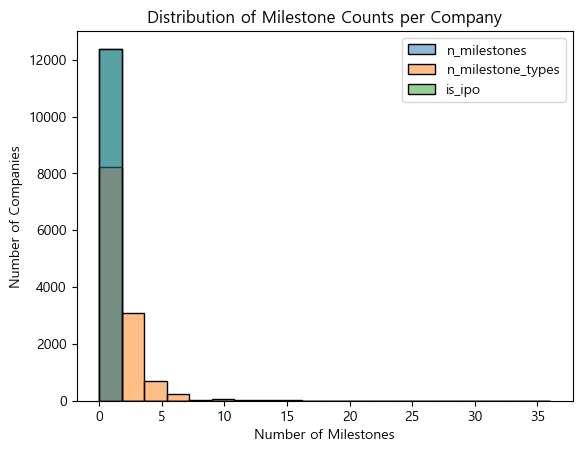

In [38]:
# 회사별 마일스톤 수
ipo_mile_counts = (
    ipo_issues
    .groupby("mile_cfpr_id")
    .agg(
        n_milestones=("mile_cfpr_id", "nunique"),          # 마일스톤 개수
        n_milestone_types=("cat_mile_description", "nunique"),  # 마일스톤 유형 개수
        is_ipo  = ("is_ipo", "max")         # 회사별 IPO 성공 여부(한 번이라도 1이면 1)
    )
    .reset_index()
)
# display(ipo_mile_counts)
display(ipo_mile_counts.describe())

sns.histplot(ipo_mile_counts, bins=20)
plt.title("Distribution of Milestone Counts per Company")
plt.xlabel("Number of Milestones")
plt.ylabel("Number of Companies")
plt.show()

In [39]:
# IPO 이력있는 회사가 가진 milestone 유형
cond1 = (ipo_issues["is_ipo"]==1)
ipo_issues.loc[cond1, "cat_mile_description"].value_counts()

cat_mile_description
acquisition          263
ipo                  142
award                109
launch               108
announce              93
funding               93
buy                   51
hiring                50
product_update        34
partnership           30
partner               22
close                 20
patent                15
open                  14
successfactors        12
google                12
pandora               11
purchase              11
received              11
win                   11
leadership_change     10
named                 10
apple                  9
harris                 9
report                 9
twitter                8
file                   8
rebrand                8
facebook               8
irobot                 7
legal                  7
tibco                  7
integrate              6
aerovironment          6
microsoft              6
telecommunication      6
gt                     5
comtech                5
orbit                  5
zyng

In [40]:
ipo_issues["public_at"] = pd.to_datetime(ipo_issues["public_at"], errors="coerce")
ipo_issues["founded_at"] = pd.to_datetime(ipo_issues["founded_at"], errors="coerce")
ipo_issues["closed_at"] = pd.to_datetime(ipo_issues["closed_at"], errors="coerce")


In [41]:
# IPO 이력있는 회사의 IPO 1년이내에 가진 milestone 유형
cond1 = (ipo_issues["is_ipo"]==1)
cond2 = (ipo_issues["public_at"])
ipo_issues.loc[cond1, "cat_mile_description"].value_counts()

cat_mile_description
acquisition          263
ipo                  142
award                109
launch               108
announce              93
funding               93
buy                   51
hiring                50
product_update        34
partnership           30
partner               22
close                 20
patent                15
open                  14
successfactors        12
google                12
pandora               11
purchase              11
received              11
win                   11
leadership_change     10
named                 10
apple                  9
harris                 9
report                 9
twitter                8
file                   8
rebrand                8
facebook               8
irobot                 7
legal                  7
tibco                  7
integrate              6
aerovironment          6
microsoft              6
telecommunication      6
gt                     5
comtech                5
orbit                  5
zyng

마일스톤의 수 분포와 IPO 여부

In [42]:
# IPO 성공 스타트업의 평균 마일스톤 횟수 계산
# IPO 성공한 스타트업만 필터
ipo_companies = ipo_mile_counts[ipo_mile_counts["is_ipo"] == 1]

# 평균 마일스톤 횟수 계산
avg_milestones_ipo = ipo_companies["n_milestones"].mean()

print("IPO 성공한 스타트업의 평균 마일스톤 횟수:", avg_milestones_ipo)


IPO 성공한 스타트업의 평균 마일스톤 횟수: 1.0


IPO 성공 vs 비성공 평균 마일스톤 비교

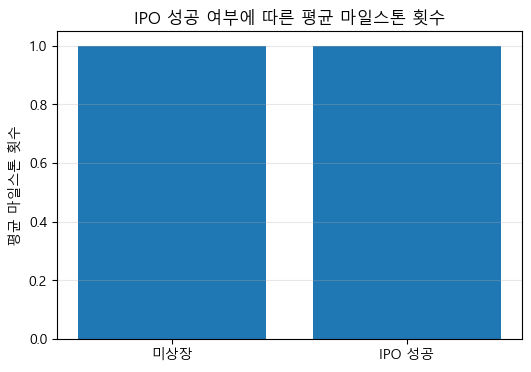

In [43]:
# IPO 성공 vs 비성공 평균 마일스톤 비교

# 1) IPO 성공 여부별 평균 마일스톤 횟수 집계
ipo_mean_by_group = (
    ipo_mile_counts
      .groupby("is_ipo")["n_milestones"]
      .mean()
      .reset_index()
)

# is_ipo를 0/1 → 라벨로 바꾸면 보기 더 편함
ipo_mean_by_group["ipo_label"] = ipo_mean_by_group["is_ipo"].map({0: "미상장", 1: "IPO 성공"})

# 2) 막대그래프
plt.figure(figsize=(6, 4))
plt.bar(ipo_mean_by_group["ipo_label"], ipo_mean_by_group["n_milestones"])
plt.ylabel("평균 마일스톤 횟수")
plt.title("IPO 성공 여부에 따른 평균 마일스톤 횟수")
plt.grid(axis="y", alpha=0.3)
plt.show()


IPO 성공 스타트업 내부 분포

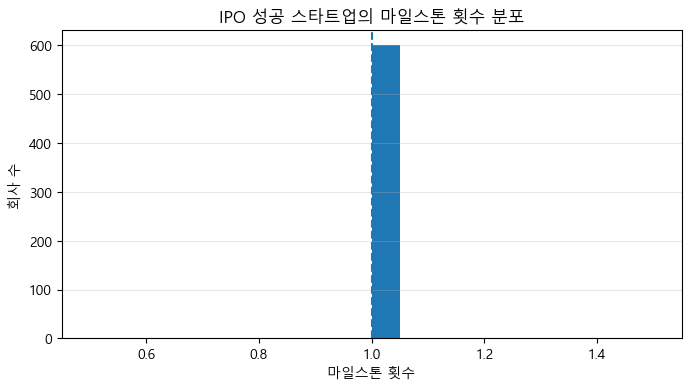

In [44]:
# IPO 성공 스타트업 내부 분포 보기
# IPO 성공 스타트업들의 마일스톤 횟수 분포
milestones_ipo = ipo_companies["n_milestones"]

plt.figure(figsize=(8, 4))
plt.hist(milestones_ipo, bins=20)
plt.axvline(milestones_ipo.mean(), linestyle="--")
plt.xlabel("마일스톤 횟수")
plt.ylabel("회사 수")
plt.title("IPO 성공 스타트업의 마일스톤 횟수 분포")
plt.grid(axis="y", alpha=0.3)
plt.show()


마일스톤 유형 수 분포와 M&A 여부

In [45]:
# 1) 회사별 마일스톤 유형 수 & IPO 여부 요약
ipo_company_types = (
    df_ipo_issues
      .groupby("objects_cfpr_id")
      .agg(
          n_milestone_types = ("cat_mile_description", "nunique"),  # 서로 다른 마일스톤 유형 개수
          is_ipo            = ("is_ipo", "max")                # 회사 단위 IPO 여부 (한 번이라도 1이면 1)
      )
      .reset_index()
)

ipo_company_types.sort_values(by="n_milestone_types", ascending=False)

,objects_cfpr_id,n_milestone_types,is_ipo
16182,r:1005,42,0
14010,p:155140,39,0
13963,p:150917,38,0
3605,c:190997,36,0
14196,p:172961,35,0
...,...,...,...
17002,r:9696,1,0
17001,r:9582,1,0
17000,r:9516,1,0
16999,r:9515,1,0


In [46]:
# 전체 마일스톤 유형 수 분포
ipo_company_types["n_milestone_types"].describe()

count    17009.000000
mean         1.700100
std          1.777472
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         42.000000
Name: n_milestone_types, dtype: float64

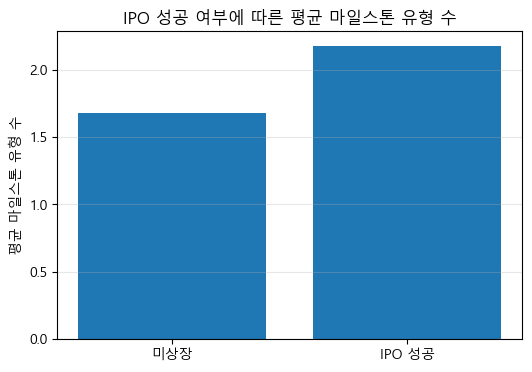

In [47]:
# IPO 여부별 평균 마일스톤 유형 수
# 3-1) IPO 여부별 평균 마일스톤 유형 수
mean_types_by_ipo = (
    ipo_company_types
      .groupby("is_ipo")["n_milestone_types"]
      .mean()
      .reset_index()
)

# 0/1 → 라벨로 바꾸기
mean_types_by_ipo["ipo_label"] = mean_types_by_ipo["is_ipo"].map(
    {0: "미상장", 1: "IPO 성공"}
)

# 3-2) 막대그래프
plt.figure(figsize=(6, 4))
plt.bar(mean_types_by_ipo["ipo_label"], mean_types_by_ipo["n_milestone_types"])
plt.ylabel("평균 마일스톤 유형 수")
plt.title("IPO 성공 여부에 따른 평균 마일스톤 유형 수")
plt.grid(axis="y", alpha=0.3)
plt.show()


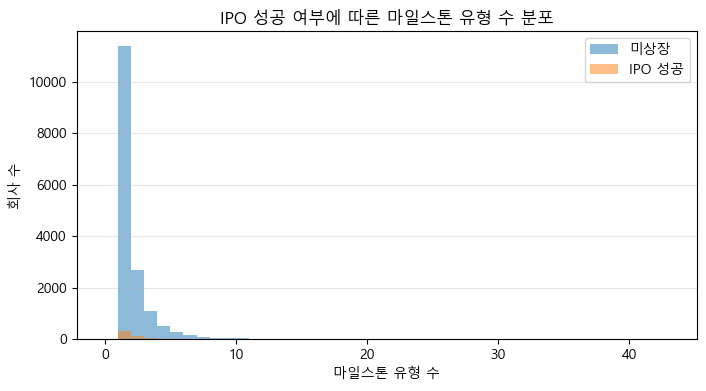

In [48]:
# IPO 성공/미성공 그룹별 분포 비교
# 4-1) 성공/미성공 그룹 분리
types_ipo       = ipo_company_types[ipo_company_types["is_ipo"] == 1]["n_milestone_types"]
types_not_ipo   = ipo_company_types[ipo_company_types["is_ipo"] == 0]["n_milestone_types"]

# 4-2) 히스토그램 (두 그룹 비교)
plt.figure(figsize=(8, 4))

plt.hist(types_not_ipo, bins=range(0, types_not_ipo.max() + 2), alpha=0.5, label="미상장")
plt.hist(types_ipo, bins=range(0, types_ipo.max() + 2), alpha=0.5, label="IPO 성공")

plt.xlabel("마일스톤 유형 수")
plt.ylabel("회사 수")
plt.title("IPO 성공 여부에 따른 마일스톤 유형 수 분포")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.show()


IPO 성공한 회사가 가지고있는 milestone의 category 유형

In [49]:
# 1) IPO 성공한 마일스톤 행만 필터
ipo_public_company = df_ipo_issues[df_ipo_issues["is_ipo"] == 1].copy()

ipo_public_company[["objects_cfpr_id", "cat_mile_description"]].head()


,objects_cfpr_id,cat_mile_description
0,c:12,survives
2,c:59,more
5,c:283,announce
14,c:12,partnership
15,c:12,legal


In [50]:
# 2) 회사-카테고리 단위로 중복 제거
ipo_public_company_cat = (
    ipo_public_company[["objects_cfpr_id", "cat_mile_description"]]
      .dropna(subset=["cat_mile_description"])
      .drop_duplicates()
)

ipo_public_company_cat["cat_mile_description"].value_counts()

cat_mile_description
acquisition          177
ipo                  105
funding               75
announce              69
launch                59
award                 53
buy                   46
hiring                44
partnership           28
product_update        25
close                 19
partner               18
patent                13
open                  12
purchase              11
named                 10
win                    8
leadership_change      8
file                   8
report                 8
legal                  7
received               6
rebrand                6
integrate              5
collaborate            4
plans                  4
first                  3
acquire                3
go                     3
pricing                3
ceo                    3
added                  3
secure                 3
boom                   2
begun                  2
campaign               2
network                2
deal                   2
introduced             2
sign

In [51]:
# 3) 카테고리별로, 그 카테고리를 가진 IPO 성공 회사 수 집계
ipo_public_cat_stats = (
    ipo_public_company_cat
      .groupby("cat_mile_description")
      .agg(
          n_companies=("objects_cfpr_id", "nunique")  # 이 카테고리를 가진 IPO 성공 회사 수
      )
      .reset_index()
      .sort_values("n_companies", ascending=False)
)

ipo_public_cat_stats.head(20)

,cat_mile_description,n_companies
19,acquisition,177
211,ipo,105
163,funding,75
42,announce,69
229,launch,59
62,award,53
79,buy,46
186,hiring,44
297,partnership,28
318,product_update,25


In [52]:
# 전체 IPO 성공 회사 수
n_public_companies = df_ipo_issues.loc[df_ipo_issues["is_ipo"] == 1, "objects_cfpr_id"].nunique()

ipo_public_cat_stats["company_ratio_%"] = ipo_public_cat_stats["n_companies"] / n_public_companies * 100

ipo_public_cat_stats.head(20)


,cat_mile_description,n_companies,company_ratio_%
19,acquisition,177,29.500000
211,ipo,105,17.500000
163,funding,75,12.500000
42,announce,69,11.500000
229,launch,59,9.833333
62,award,53,8.833333
79,buy,46,7.666667
186,hiring,44,7.333333
297,partnership,28,4.666667
318,product_update,25,4.166667


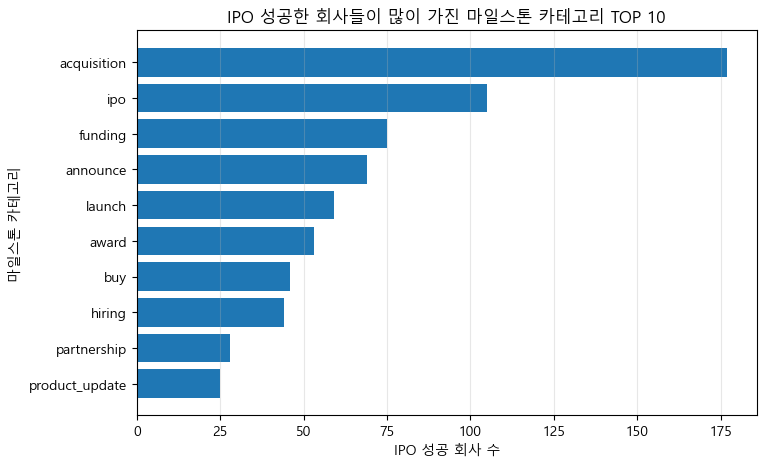

In [53]:
# TOP 10 카테고리만 사용
topN = 10
plot_data = ipo_public_cat_stats.head(topN)

plt.figure(figsize=(8, 5))
plt.barh(plot_data["cat_mile_description"], plot_data["n_companies"])
plt.xlabel("IPO 성공 회사 수")
plt.ylabel("마일스톤 카테고리")
plt.title("IPO 성공한 회사들이 많이 가진 마일스톤 카테고리 TOP 10")
plt.gca().invert_yaxis()  # 위에서부터 큰 값이 보이게
plt.grid(axis="x", alpha=0.3)
plt.show()

IPO 성공 회사 vs 미성공 회사

In [54]:
# 1) IPO 여부, 회사, 카테고리만 사용
ipo_mile_cat = df_ipo_issues[["objects_cfpr_id", "cat_mile_description", "is_ipo"]].copy()

# 2) 카테고리 결측 제거
ipo_mile_cat = ipo_mile_cat.dropna(subset=["cat_mile_description"])

# 3) 회사-카테고리 단위로 중복 제거
ipo_company_cat = ipo_mile_cat.drop_duplicates(["objects_cfpr_id", "cat_mile_description"])

ipo_company_cat.head()

,objects_cfpr_id,cat_mile_description,is_ipo
0,c:12,survives,1
1,c:3138,product_update,0
2,c:59,more,1
3,c:314,launch,0
4,c:314,product_update,0


In [55]:
# 2-1) IPO 성공 그룹만
ipo_public_cat = ipo_company_cat[ipo_company_cat["is_ipo"] == 1].copy()

# 카테고리별: 이 카테고리를 가진 '성공 회사 수'
ipo_public_cat_stats = (
    ipo_public_cat
      .groupby("cat_mile_description")
      .agg(
          n_companies_public=("objects_cfpr_id", "nunique")
      )
      .reset_index()
)

# 전체 IPO 성공 회사 수 (분모)
ipo_total_public_companies = ipo_company_cat.loc[ipo_company_cat["is_ipo"] == 1, "objects_cfpr_id"].nunique()

# 성공 그룹 내 비율(%)
ipo_public_cat_stats["public_ratio_%"] = ipo_public_cat_stats["n_companies_public"] / ipo_total_public_companies * 100

ipo_public_cat_stats.head()


,cat_mile_description,n_companies_public,public_ratio_%
0,'return,2,0.333333
1,1,1,0.166667
2,15,1,0.166667
3,1998,1,0.166667
4,200,1,0.166667


In [56]:
# 2-2) IPO 미성공 그룹
ipo_non_public_cat = ipo_company_cat[ipo_company_cat["is_ipo"] == 0].copy()

ipo_non_public_cat_stats = (
    ipo_non_public_cat
      .groupby("cat_mile_description")
      .agg(
          n_companies_nonpublic=("objects_cfpr_id", "nunique")
      )
      .reset_index()
)

ipo_total_nonpublic_companies = ipo_company_cat.loc[ipo_company_cat["is_ipo"] == 0, "objects_cfpr_id"].nunique()

ipo_non_public_cat_stats["nonpublic_ratio_%"] = ipo_non_public_cat_stats["n_companies_nonpublic"] / ipo_total_nonpublic_companies * 100

ipo_non_public_cat_stats.head()


,cat_mile_description,n_companies_nonpublic,nonpublic_ratio_%
0,'tis,1,0.006094
1,0,1,0.006094
2,1,48,0.292522
3,10,17,0.103602
4,100,31,0.188921


In [57]:
# 3) 성공/미성공 카테고리 통계 병합
ipo_mile_cat_compare = (
    ipo_public_cat_stats
      .merge(ipo_non_public_cat_stats, on="cat_mile_description", how="outer")
      .fillna(0)   # 일부 category가 한쪽 그룹에만 있을 수 있으므로 0으로 채움
)

# lift(성공 그룹 비율 / 미성공 그룹 비율) 계산 (0 division 방어)
ipo_mile_cat_compare["lift_public_over_nonpublic"] = ipo_mile_cat_compare.apply(
    lambda row: row["public_ratio_%"] / row["nonpublic_ratio_%"] if row["nonpublic_ratio_%"] > 0 else None,
    axis=1
)

# 성공 그룹 비율이 높은 순으로 정렬
ipo_mile_cat_compare = ipo_mile_cat_compare.sort_values("public_ratio_%", ascending=False)

ipo_mile_cat_compare.head(20)


,cat_mile_description,n_companies_public,public_ratio_%,n_companies_nonpublic,nonpublic_ratio_%,lift_public_over_nonpublic
216,acquisition,177.0,29.500000,1797.0,10.951307,2.693742
2951,ipo,105.0,17.500000,166.0,1.011640,17.298645
2294,funding,75.0,12.500000,2115.0,12.889268,0.969799
474,announce,69.0,11.500000,874.0,5.326345,2.159079
3252,launch,59.0,9.833333,3847.0,23.444451,0.419431
683,award,53.0,8.833333,1520.0,9.263209,0.953593
1002,buy,46.0,7.666667,195.0,1.188372,6.451402
2625,hiring,44.0,7.333333,1545.0,9.415565,0.778852
4235,partnership,28.0,4.666667,555.0,3.382290,1.379736
4500,product_update,25.0,4.166667,589.0,3.589494,1.160795


In [58]:
topN = 10

# 성공 비율 기준 상위 N개 카테고리만
ipo_plot_data = ipo_mile_cat_compare.head(topN)

ipo_plot_data[["cat_mile_description", "public_ratio_%", "nonpublic_ratio_%", "lift_public_over_nonpublic"]]


,cat_mile_description,public_ratio_%,nonpublic_ratio_%,lift_public_over_nonpublic
216,acquisition,29.500000,10.951307,2.693742
2951,ipo,17.500000,1.011640,17.298645
2294,funding,12.500000,12.889268,0.969799
474,announce,11.500000,5.326345,2.159079
3252,launch,9.833333,23.444451,0.419431
683,award,8.833333,9.263209,0.953593
1002,buy,7.666667,1.188372,6.451402
2625,hiring,7.333333,9.415565,0.778852
4235,partnership,4.666667,3.382290,1.379736
4500,product_update,4.166667,3.589494,1.160795


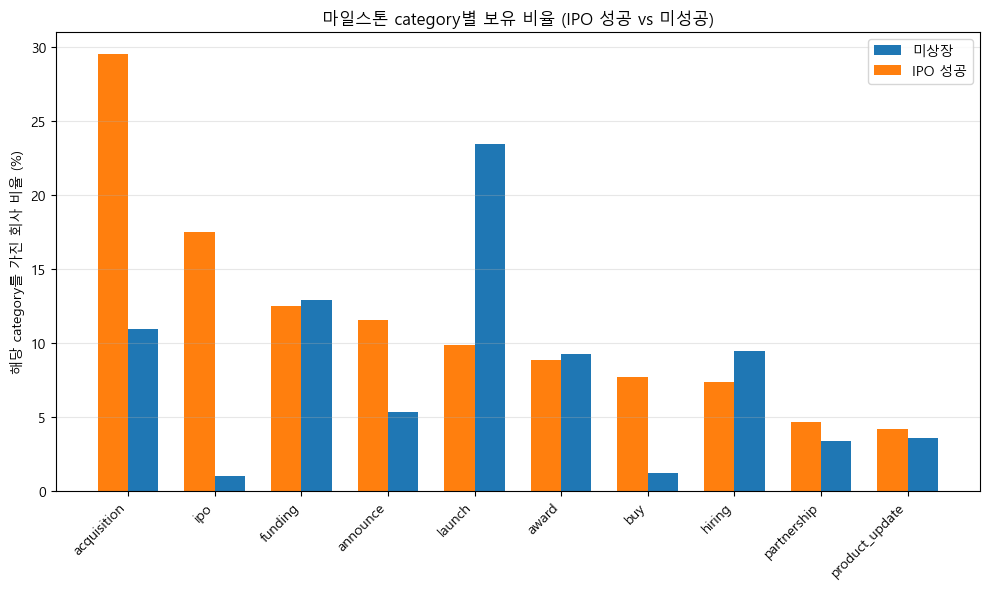

In [59]:
plt.figure(figsize=(10, 6))

x = np.arange(len(ipo_plot_data))
width = 0.35

plt.bar(x + width/2, ipo_plot_data["nonpublic_ratio_%"], width, label="미상장")
plt.bar(x - width/2, ipo_plot_data["public_ratio_%"],   width, label="IPO 성공")

plt.xticks(x, ipo_plot_data["cat_mile_description"], rotation=45, ha="right")
plt.ylabel("해당 category를 가진 회사 비율 (%)")
plt.title("마일스톤 category별 보유 비율 (IPO 성공 vs 미성공)")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()